In [11]:
import H1
import numpy as np
import matplotlib.pyplot as plt

In [64]:
ground_freq, ground_power = H1.load_file('20240216/astsp24/test_ground2.csv')
sky_freq, sky_power = H1.load_file('20240216/astsp24/test_sky2.csv')
source_freq, source_power = H1.load_file('20240216/astsp24/test_source1.csv')
source_freq2, source_power2 = H1.load_file('20240216/astsp24/test_source2.csv')

In [65]:
ground_power[0]

-37.5

In [66]:
def db_to_watt(db_array):
    watt_array = []
    for i in range(len(db_array)):
        watt = 10**((db_array[i]-30)/10)
        watt_array.append(watt)
    return watt_array

In [67]:
source_lsr = H1.lsr(225,13,(2024,2,16,12,13,0))
source_lsr2 = H1.lsr(258,60,(2024,2,16,12,45,0))

In [68]:
print(source_lsr)
print(source_lsr2)

34.88713510771709 km / s
25.15755317035446 km / s


In [69]:
source_lsr_ms = 34.887
source_lsr_ms2 = 25.158

In [70]:
ground_power = db_to_watt(ground_power)
sky_power = db_to_watt(sky_power)
source_power = db_to_watt(source_power)
source_power2 = db_to_watt(source_power2)

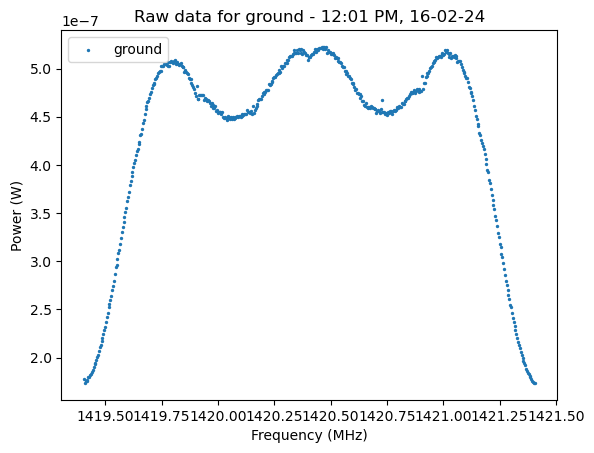

In [71]:
plt.scatter(ground_freq/1000000, ground_power, s=2, label='ground')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (W)')
plt.title('Raw data for ground - 12:01 PM, 16-02-24')
plt.legend()
plt.savefig('ground_raw.png')
plt.show()

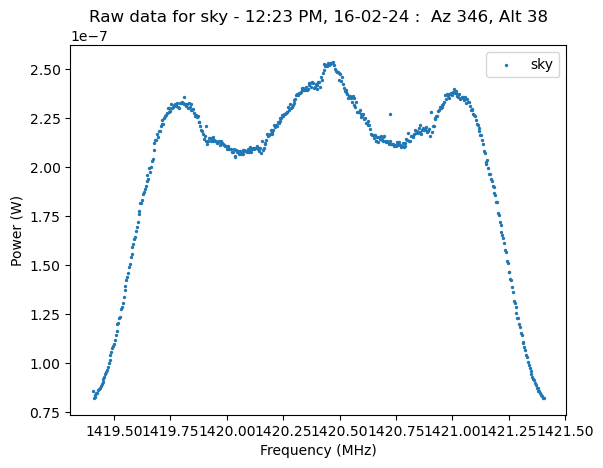

In [72]:
plt.scatter(sky_freq/1000000, sky_power, s=2, label='sky')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (W)')
plt.title('Raw data for sky - 12:23 PM, 16-02-24 :  Az 346, Alt 38')
plt.legend()
plt.savefig('sky_raw.png')
plt.show()

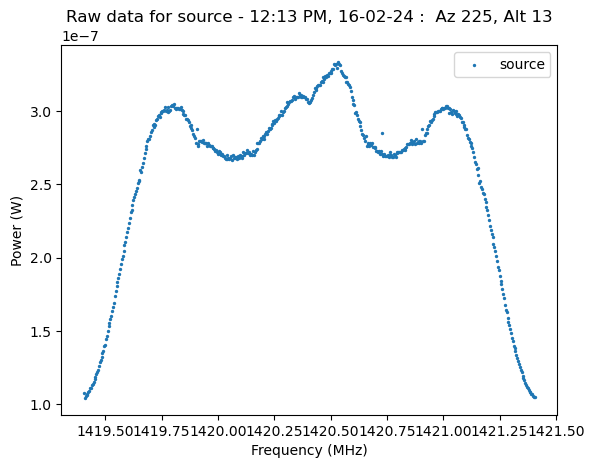

In [73]:
plt.scatter(source_freq/1000000, source_power, s=2, label='source')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (W)')
plt.title('Raw data for source - 12:13 PM, 16-02-24 :  Az 225, Alt 13')
plt.legend()
plt.savefig('source_raw.png')
plt.show()

In [74]:
ground_power[0]

1.7782794100389227e-07

In [75]:
def Tr(pg,psky,tg=300,tsky=5):
    tr_array = []
    for i in range(len(pg)):
        tr_num = tsky*(pg[i]/psky[i])-tg
        tr_den = 1 - (pg[i]/psky[i])
        tr_array.append(tr_num / tr_den)
    return tr_array

def Tsource(psource, pg, tr, tg=300):
    tsource_array = []
    for i in range(len(psource)):
        tsource_array.append((psource[i]/pg[i])*(tg+tr[i]) - tr[i])
    return tsource_array

In [76]:
receiver_temp = Tr(ground_power,sky_power)

In [77]:
source_temp = Tsource(source_power, ground_power, receiver_temp)
source_temp2 = Tsource(source_power2, ground_power, receiver_temp)

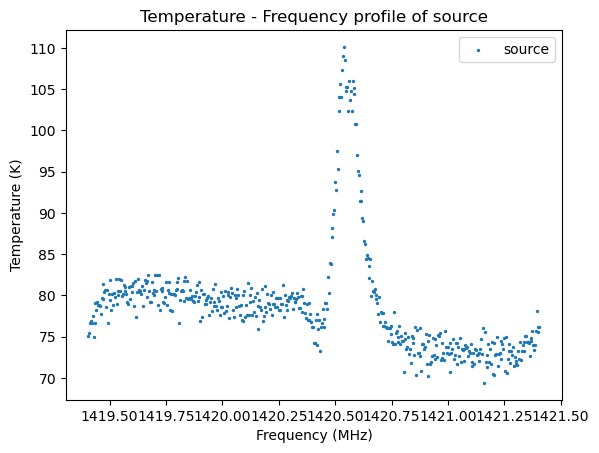

In [78]:
# source_freq_mhz = source_freq/1000000
plt.scatter(source_freq/1000000, source_temp, s=2, label='source')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Temperature (K)')
plt.title('Temperature - Frequency profile of source')
plt.legend()
plt.savefig('source_tf.png')
plt.show()

In [79]:
def findVelocity(freq,f0,lsr,c=299792.458):
    vel = []
    for i in range(len(freq)):
        v0 = c*(1-(freq[i]/f0))
        vel.append(v0+lsr)
    return vel

In [80]:
source_velocity = findVelocity(source_freq, 1420405751, source_lsr_ms)
source_velocity2 = findVelocity(source_freq2, 1420405751, source_lsr_ms2)

In [81]:
# source_velocity_lsr_corrected = [vel + source_lsr for vel in source_velocity]

In [82]:
# source_velocity

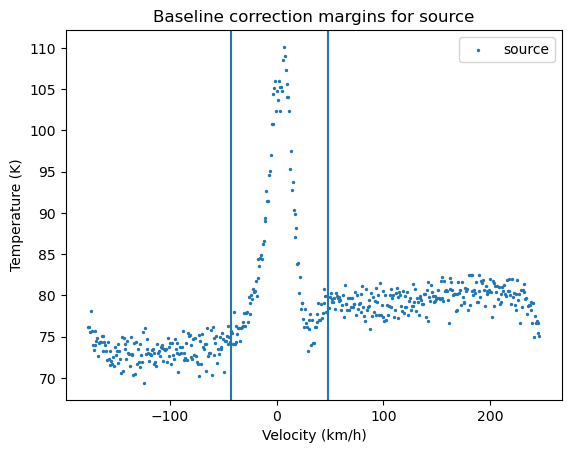

In [83]:
plt.scatter(source_velocity,source_temp, s=2, label='source')
# plt.scatter(source_velocity2,source_temp, s=5, label='test_source2', color='green')
plt.xlabel('Velocity (km/h)')
plt.ylabel('Temperature (K)')
plt.axvline(source_velocity[240])
plt.axvline(source_velocity[350])
plt.legend()
plt.title('Baseline correction margins for source')
plt.savefig('before_baseline.png')
plt.show()

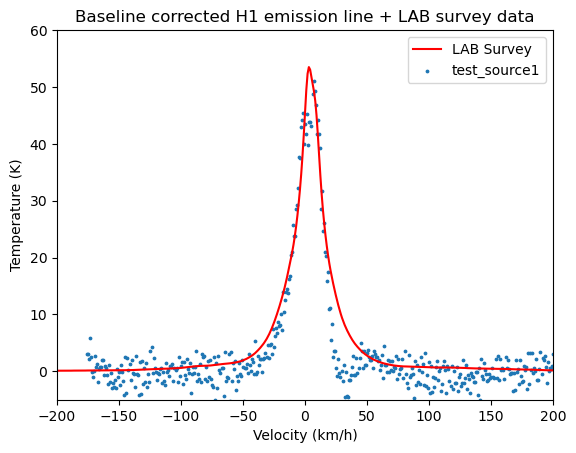

In [89]:
# lab_vel, lab_temp = np.loadtxt('./spectrum.txt', unpack=True)
lab_vel = np.loadtxt('./vel_lab')
lab_temp = np.loadtxt('./temp_lab')
plt.plot(lab_vel, lab_temp,color='red', label='LAB Survey')


source_velocity = np.array(source_velocity)
source_temp = np.array(source_temp)
source_velocity2 = np.array(source_velocity2)
source_temp2 = np.array(source_temp2)
source_temp_baseline_corrected = H1.baseline_sub(source_velocity,source_temp,240,350)
source_temp_baseline_corrected2 = H1.baseline_sub(source_velocity2,source_temp,240,350)
plt.scatter(source_velocity,1.5*source_temp_baseline_corrected, s=3, label='test_source1')
# plt.scatter(source_velocity2,1.5*source_temp_baseline_corrected2, s=3, label='test_source2', color='orange')
plt.xlabel('Velocity (km/h)')
plt.ylabel('Temperature (K)')
plt.title('Baseline corrected H1 emission line + LAB survey data')
plt.legend()
plt.axis([-200,200,-5,60])
# plt.axvline(0, color='black')
# plt.axhline(34, color='black')
plt.savefig('lab.png')
plt.show()

In [85]:
l, b = H1.to_galactic(225,13,(2024,2,16,12,13,0))

In [20]:
l

1.3664354823853264

In [21]:
b

-3.6014715744678836

In [22]:
# plt.scatter(source_freq, source_power, s=5)
# plt.show()